In [191]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
from  torchvision import datasets, transforms

In [192]:
mnist_train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

print(f"MNIST train data shape: {mnist_train.data.shape}")
print(f"MNIST test data shape: {mnist_test.data.shape}")

MNIST train data shape: torch.Size([60000, 28, 28])
MNIST test data shape: torch.Size([10000, 28, 28])


In [193]:
image, label = mnist_train[5]
print(image.shape)
image = image.reshape([28, 28])
print(image.shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


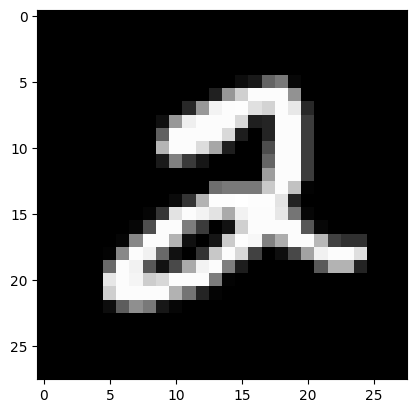

2


In [194]:
plt.imshow(image, cmap='gray')
plt.show()
print(label)

In [195]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [196]:
data_train_iter = iter(train_loader)
image, labels = data_train_iter.__next__()
print(image.shape)
print(labels.shape)


torch.Size([100, 1, 28, 28])
torch.Size([100])


In [197]:
x = image.view(-1, 28*28)
print(x.shape)

torch.Size([100, 784])


$$
y_1 = \sum_i{x_iw_{i,1} + b_1}
$$

$$
y = xW + b
$$

In [198]:
W = torch.randn(784, 10) / np.sqrt(784) # Xavier initialization
W.requires_grad_(True)
b = torch.zeros(10, requires_grad=True)

In [199]:
y = torch.matmul(x, W) + b
print(y[0,:])

tensor([-0.1235, -0.5532,  0.7646, -0.2373, -0.4673,  0.0622, -0.1293, -0.0117,
        -0.4098,  0.0696], grad_fn=<SliceBackward0>)


$$
p(y_i) = softmax(y_i) = \frac{exp(y_i)}{\sum_j{exp(y_j)}}
$$

In [200]:
# py_eq = torch.exp(y)/torch.sum(torch.exp(y), dim=1, keepdim=True)
# print(py_eq[0])

In [201]:
py = F.softmax(y, dim=1)
print(py[0])

tensor([0.0912, 0.0594, 0.2217, 0.0814, 0.0647, 0.1098, 0.0907, 0.1020, 0.0685,
        0.1106], grad_fn=<SelectBackward0>)


#### Cross entropy

$$
H_{y'}(y) = - \sum_{i}{y'}_i \\log(y_i)
$$

In [202]:
# cross_entropy_eq = torch.mean(-torch.log(py)[range(labels.shape[0]), labels])
# print(cross_entropy_eq)

In [203]:
cross_entropy = F.cross_entropy(y, labels)
print(cross_entropy)

tensor(2.3727, grad_fn=<NllLossBackward0>)


In [204]:
# Stochastic gradient descent

optimizer = torch.optim.SGD([W, b], lr=0.1)
cross_entropy.backward()
b.grad

tensor([-0.0820,  0.0187,  0.0445, -0.0612,  0.0316, -0.0337,  0.0401, -0.0085,
         0.0248,  0.0257])

In [205]:
optimizer.step()

In [206]:
b

tensor([ 0.0082, -0.0019, -0.0044,  0.0061, -0.0032,  0.0034, -0.0040,  0.0008,
        -0.0025, -0.0026], requires_grad=True)

In [207]:
print(b.grad)
optimizer.zero_grad()
print(b.grad)

tensor([-0.0820,  0.0187,  0.0445, -0.0612,  0.0316, -0.0337,  0.0401, -0.0085,
         0.0248,  0.0257])
None


In [208]:
from tqdm import tqdm
print(len(train_loader))
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()

    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)

    cross_entropy.backward()
    optimizer.step()

600


100%|██████████| 600/600 [00:07<00:00, 83.74it/s]


In [209]:
correct = 0
total = len(mnist_test)
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        pred = torch.argmax(y, dim=1)
        correct += torch.sum(pred == labels).float()
print(correct / total)

100%|██████████| 100/100 [00:01<00:00, 88.95it/s]

tensor(0.9035)


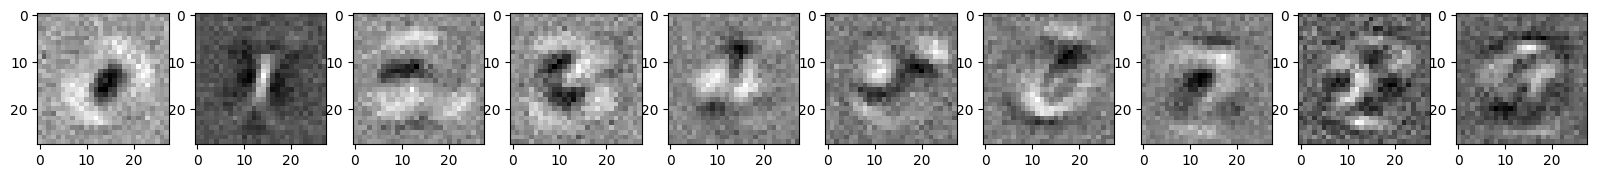

In [210]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(W[:,i].detach().view(28,28), cmap='gray')